# Intro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as dt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
import time
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.colors as mcolors

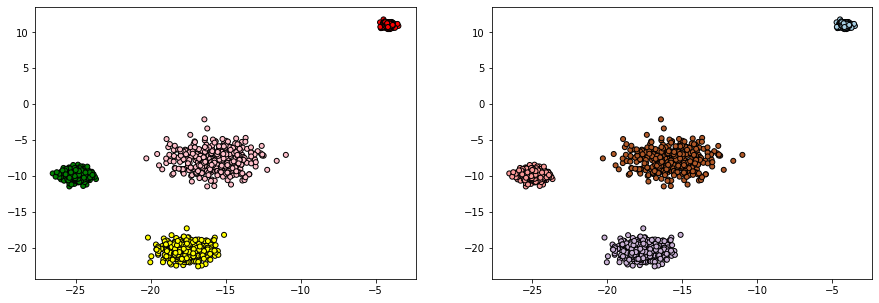

In [3]:
samples = 1500
state = 1
n = 4

my_own = mcolors.ListedColormap(['red', 'green', 'yellow', 'pink'])

X, y = make_blobs(n_samples = samples, random_state = state, 
                  centers = n,
                  cluster_std = [0.2,0.5,0.9,1.5],
                 center_box=(-25.0, 25.0))

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1], c = y, cmap = my_own, s = 25, edgecolor = "k")

plt.subplot(122)
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.Paired, s = 25, edgecolor = "k")
plt.show()

# Wrong Number of Blobs

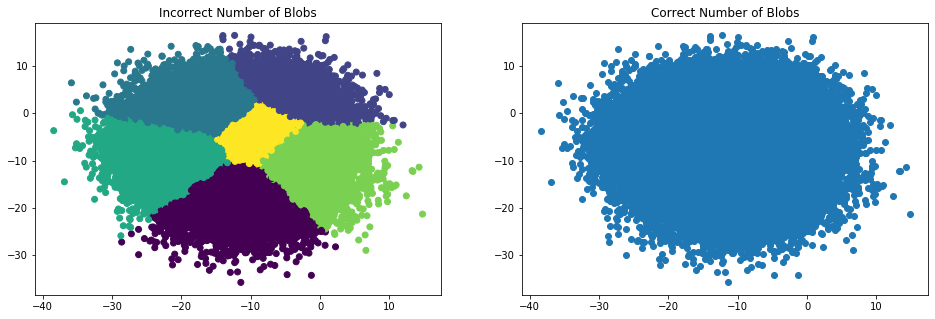

In [22]:
n = 4
samples = 1500
X, y = make_blobs(n_samples = samples, random_state = state, 
                  centers = n,
                  cluster_std = [1,5.6,5.6,5.6],
                  center_box=(-15,15))

cluster_model_wrong = KMeans(n_clusters = n+2 , random_state = state)
cluster_model_wrong.fit(X)
y_pred_wrong = cluster_model_wrong.labels_

cluster_model = KMeans(n_clusters = n , random_state = state)
cluster_model.fit(X)
y_pred = cluster_model.labels_

plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_wrong)
plt.title("Incorrect Number of Blobs")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.title("Correct Number of Blobs")
plt.show() 

In [23]:
inertia_list = np.array([])
for j in np.arange(12):
    mod = KMeans(n_clusters = j+1 , random_state = state)
    mod.fit(X)
    inertia_list = np.append(inertia_list, mod.inertia_)

plt.figure(figsize = (10,5))
plt.scatter(np.arange(12) +  1, inertia_list)
plt.show()



KeyboardInterrupt: 

In [7]:
cluster_model.inertia_

2960.847591074378

In [9]:
cluster_model_wrong.inertia_

2437.708150959573

# Anisotropicly Distributed Data

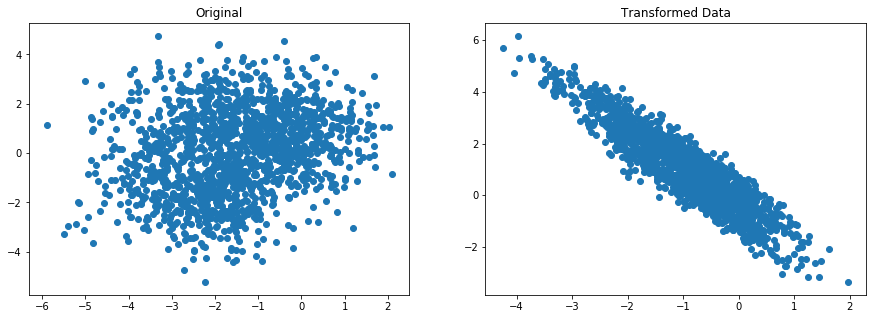

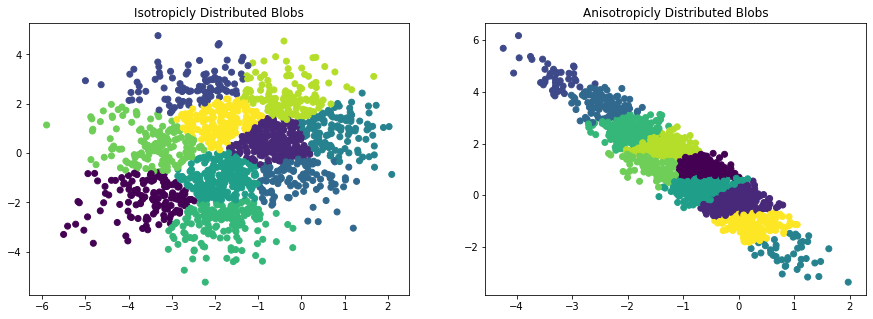

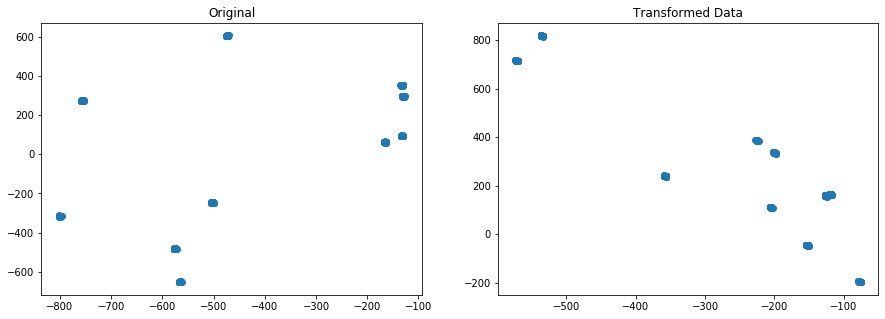

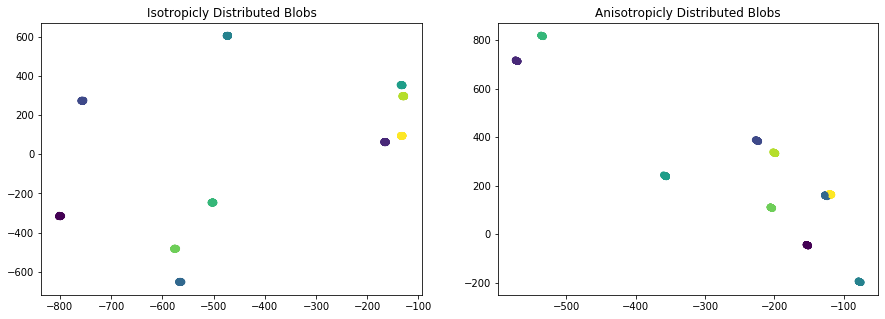

In [32]:
n = 10
samples = 1500
X, y = make_blobs(n_samples = samples, random_state = state, 
                  centers = n,
                  center_box = (-3,3))

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.title("Original")

plt.subplot(122)
plt.scatter(X_aniso[:,0], X_aniso[:,1])
plt.title("Transformed Data")
plt.show()


mod_X = KMeans(n_clusters = n)
y_pred_X = mod_X.fit(X).labels_

mod_X_aniso = KMeans(n_clusters = n)
y_pred_X_aniso = mod_X_aniso.fit(X_aniso).labels_

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_X)
plt.title("Isotropicly Distributed Blobs")

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred_X_aniso)
plt.title("Anisotropicly Distributed Blobs")
plt.show()



X, y = make_blobs(n_samples = samples, random_state = state, 
                  centers = n,
                  center_box = (-800,800))

X_aniso = np.dot(X, transformation)



plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.title("Original")

plt.subplot(122)
plt.scatter(X_aniso[:,0], X_aniso[:,1])
plt.title("Transformed Data")
plt.show()


mod_X = KMeans(n_clusters = n)
y_pred_X = mod_X.fit(X).labels_

mod_X_aniso = KMeans(n_clusters = n)
y_pred_X_aniso = mod_X_aniso.fit(X_aniso).labels_

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_X)
plt.title("Isotropicly Distributed Blobs")

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred_X_aniso)
plt.title("Anisotropicly Distributed Blobs")
plt.show()

# Different Variance

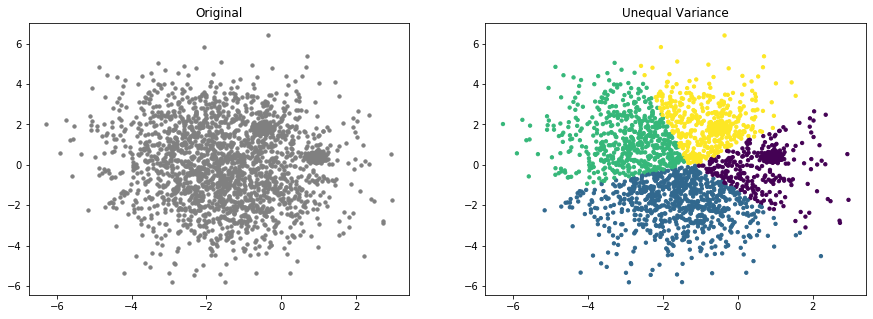

In [42]:
state = 42

X_varied, y_varied = make_blobs(centers = 4,
                                n_samples = 4000, random_state = state, 
                                cluster_std = [0.1, 0.1, 1.4, 1.4],
                                center_box=(-2.0, 2.0))


y_pred_varied = KMeans(n_clusters = 4, random_state = state).fit_predict(X_varied)


plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X_varied[:,0],X_varied[:,1], c = "grey", s = 11)
plt.title("Original")


plt.subplot(122)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c = y_pred_varied, s = 11)
plt.title("Unequal Variance")
plt.show()

# Unevenly Sized Blobs

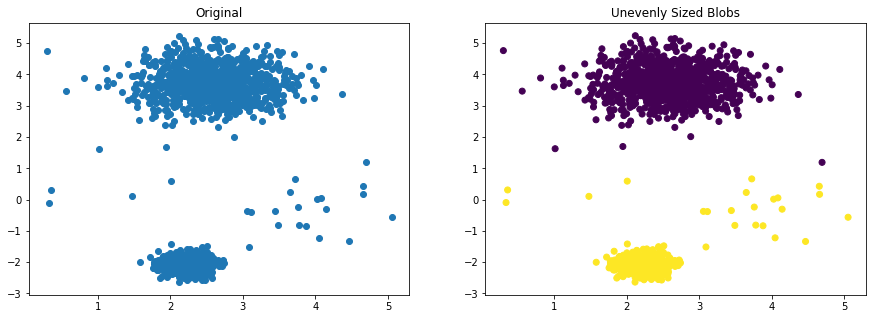

In [48]:
state=13
X, y = make_blobs(n_samples = [500,1000,20,10], random_state = state, 
                  centers = None, cluster_std = [0.2,0.5,0.9,1.5],
                  center_box=(-4, 4))

y_pred = KMeans(n_clusters = 2, random_state = state).fit_predict(X)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1])
plt.title("Original")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.title("Unevenly Sized Blobs")
plt.show()

# Mini Batch KMeans

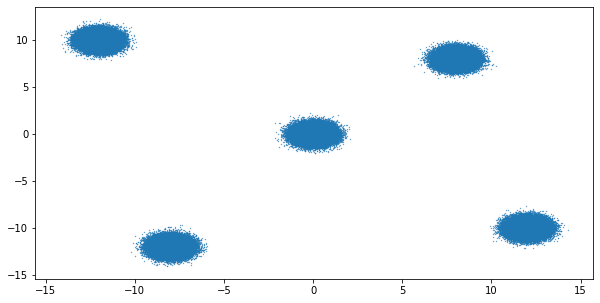

In [68]:
samples = 500000    
centers = [[0,0],[8,8],[-8,-12],[12,-10],[-12,10]]
X, y = make_blobs(n_samples = samples, 
                  random_state = 1, 
                  centers = centers, 
                  cluster_std = 0.5)

plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1], s = 0.1)
plt.show()

In [69]:
start = time.time()
mod = KMeans(n_clusters = 5, random_state  = 1)
mod.fit(X)
end = time.time()

T_KMeans =  np.round(end - start, decimals = 2)
print(T_KMeans)

tt = np.argsort(mod.cluster_centers_, axis = 0)
ind = np.transpose(tt)[0]
cc = mod.cluster_centers_[ind]
label_kmeans = pairwise_distances_argmin(X, cc)

3.96


In [70]:
start = time.time()
mod_mini = MiniBatchKMeans(n_clusters = 5, 
                           batch_size = 1000, 
                           max_iter = 200)
mod_mini.fit(X)
end = time.time()
T_MiniBatchKMeans = np.round(end - start, decimals = 2)
print(T_MiniBatchKMeans)

tt_mini = np.argsort(mod_mini.cluster_centers_, axis = 0)
ind_mini = np.transpose(tt_mini)[0]
cc_mini = mod_mini.cluster_centers_[ind_mini]
label_minibatchkmeans = pairwise_distances_argmin(X, cc_mini)

0.3


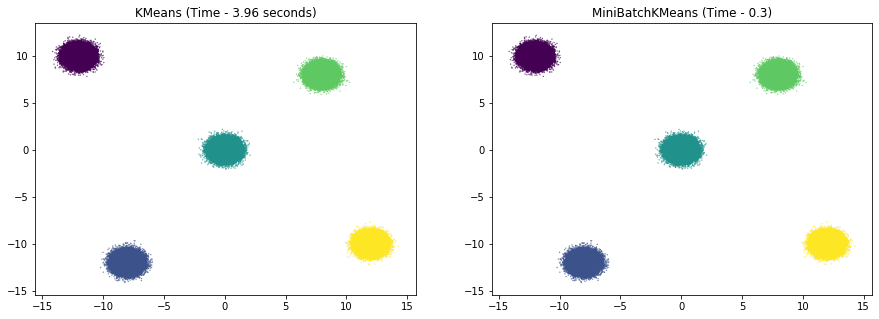

In [71]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1], c = label_kmeans, s = 0.1)
plt.title("KMeans (Time - %s seconds)" %T_KMeans)

plt.subplot(122)
plt.scatter(X[:,0],X[:,1], c = label_minibatchkmeans, s = 0.1)
plt.title("MiniBatchKMeans (Time - %s)" %T_MiniBatchKMeans)
plt.show()

In [72]:
label_diff = (label_kmeans == label_minibatchkmeans)
label_diff = label_diff.astype(np.int)
print(np.sum(label_diff)/samples*100)

100.0


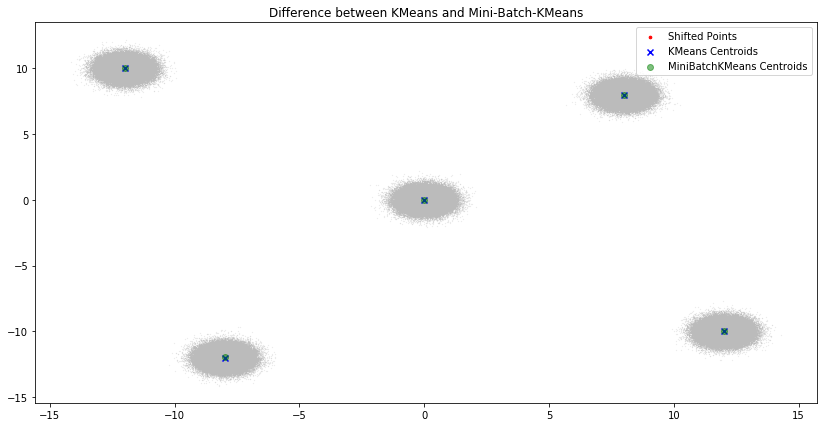

In [73]:
centroids = mod.cluster_centers_
centroids_mini = mod_mini.cluster_centers_

plt.figure(figsize = (14,7))
plt.scatter(X[label_diff == 1,0],X[label_diff == 1,1], c = '#bbbbbb', s = 0.01)
plt.scatter(X[label_diff == 0,0],X[label_diff == 0,1], c = 'r', s = 7, label = "Shifted Points")
plt.scatter(centroids[:,0], centroids[:,1], c = "blue", marker = "x", label = "KMeans Centroids")
plt.scatter(centroids_mini[:,0], centroids_mini[:,1], c = "green", alpha = 0.5, label = "MiniBatchKMeans Centroids")
plt.legend(loc = "upper right")
plt.title("Difference between KMeans and Mini-Batch-KMeans")
plt.show()

# Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

37.49524283409119


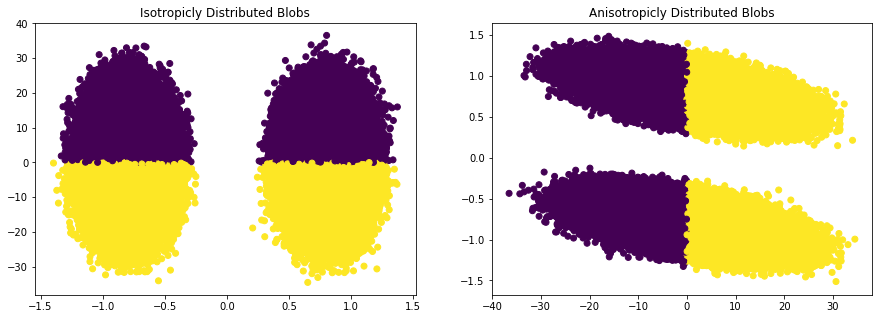

15.135467767715454


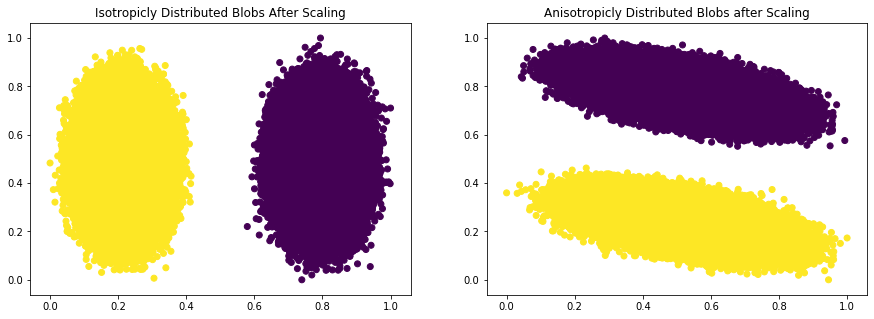

In [76]:
n = 2
samples = 2500000
X, y = make_blobs(n_samples = samples, random_state = state, 
                  centers = [[-8,0],[8,0]],
                  cluster_std = [1.2,1.2])

X[:,1] = 6* X[:,1]
X[:,0] = 0.1* X[:,0]

transformation = [[.01, -1], [-1, .01]]
X_aniso = np.dot(X, transformation)

start = time.time()
mod_X = KMeans(n_clusters = n)
y_pred_X = mod_X.fit(X).labels_

mod_X_aniso = KMeans(n_clusters = n)
y_pred_X_aniso = mod_X_aniso.fit(X_aniso).labels_
end = time.time()
print(end - start)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_X)
plt.title("Isotropicly Distributed Blobs")

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred_X_aniso)
plt.title("Anisotropicly Distributed Blobs")
plt.show()




##################  Scaling ##########################

start = time.time()
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
mod_X_norm = KMeans(n_clusters = n)
y_pred_X_norm = mod_X_norm.fit(X_norm).labels_

X_aniso_norm = scaler.fit_transform(X_aniso)
mod_X_aniso_norm = KMeans(n_clusters = n)
y_pred_X_aniso_norm = mod_X_aniso_norm.fit(X_aniso_norm).labels_
end = time.time()
print(end-start)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c = y_pred_X_norm)
plt.title("Isotropicly Distributed Blobs After Scaling")

plt.subplot(122)
plt.scatter(X_aniso_norm[:, 0], X_aniso_norm[:, 1], c = y_pred_X_aniso_norm)
plt.title("Anisotropicly Distributed Blobs after Scaling")
plt.show()

13.63231372833252


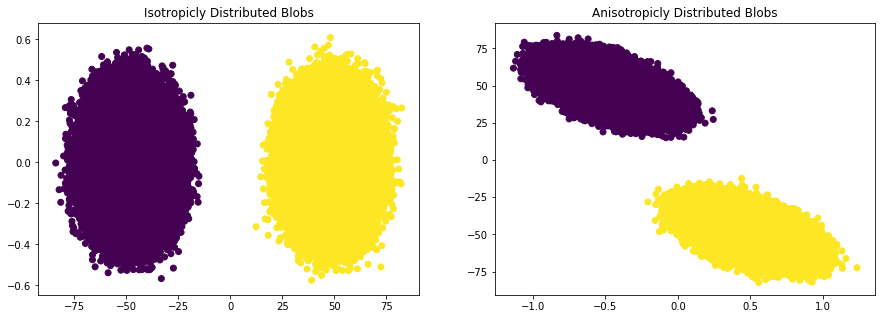

13.823201417922974


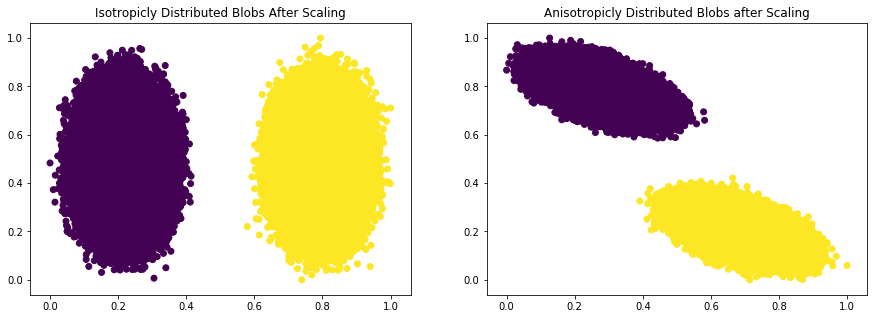

In [77]:
n = 2
samples = 2500000
X, y = make_blobs(n_samples = samples, random_state = state, 
                  centers = [[-8,0],[8,0]],
                  cluster_std = [1.2,1.2])

X[:,1] = 0.1* X[:,1]
X[:,0] = 6* X[:,0]

transformation = [[.01, -1], [-1, .01]]
X_aniso = np.dot(X, transformation)

start = time.time()
mod_X = KMeans(n_clusters = n)
y_pred_X = mod_X.fit(X).labels_

mod_X_aniso = KMeans(n_clusters = n)
y_pred_X_aniso = mod_X_aniso.fit(X_aniso).labels_
end = time.time()
print(end - start)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_X)
plt.title("Isotropicly Distributed Blobs")

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred_X_aniso)
plt.title("Anisotropicly Distributed Blobs")
plt.show()




##################  Scaling ##########################

start = time.time()
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
mod_X_norm = KMeans(n_clusters = n)
y_pred_X_norm = mod_X_norm.fit(X_norm).labels_

X_aniso_norm = scaler.fit_transform(X_aniso)
mod_X_aniso_norm = KMeans(n_clusters = n)
y_pred_X_aniso_norm = mod_X_aniso_norm.fit(X_aniso_norm).labels_
end = time.time()
print(end-start)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c = y_pred_X_norm)
plt.title("Isotropicly Distributed Blobs After Scaling")

plt.subplot(122)
plt.scatter(X_aniso_norm[:, 0], X_aniso_norm[:, 1], c = y_pred_X_aniso_norm)
plt.title("Anisotropicly Distributed Blobs after Scaling")
plt.show()

# PCA

In [78]:
from sklearn.decomposition import PCA

33.972798585891724
14.210967063903809


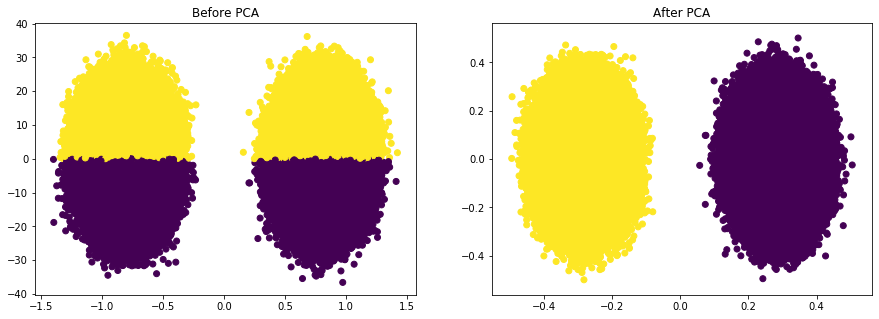

In [91]:
n = 2
samples = 5000000
X, y = make_blobs(n_samples = samples, random_state = state, 
                  centers = [[-8,0],[8,0]],
                  cluster_std = [1.2,1.2])

X[:,1] = 6*X[:,1]
X[:,0] = 0.1* X[:,0]

start = time.time()
mod_X = KMeans(n_clusters = n)
y_pred_X = mod_X.fit(X).labels_
end = time.time()
print(end-start)


start = time.time()
ss = MinMaxScaler()
mod_PCA = PCA()
X_PCA = mod_PCA.fit_transform(ss.fit_transform(X))
mod_X_PCA = KMeans(n_clusters = n)
y_pred_X_PCA = mod_X_PCA.fit(X_PCA).labels_
end = time.time()
print(end - start)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_X)
plt.title("Before PCA")

plt.subplot(122)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c = y_pred_X_PCA)
plt.title("After PCA")
plt.show()